<a href="https://colab.research.google.com/github/MadhurimaPaul-87/Machine_Learning/blob/main/covid_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import   Sequential, Model
from tensorflow.keras.layers import  Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import tensorflow as t

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!ls gdrive/MyDrive/COVID-19_Radiography_Dataset 

 COVID			      Normal.metadata.xlsx
 COVID.metadata.xlsx	      README.md.txt
 Lung_Opacity		     'Viral Pneumonia'
 Lung_Opacity.metadata.xlsx  'Viral Pneumonia.metadata.xlsx'
 Normal


In [20]:
DATASET_DIR='gdrive/MyDrive/COVID-19_Radiography_Dataset'

In [21]:
os.listdir(DATASET_DIR)

['COVID.metadata.xlsx',
 'Lung_Opacity.metadata.xlsx',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia.metadata.xlsx',
 'Lung_Opacity',
 'COVID',
 'Normal',
 'Viral Pneumonia']

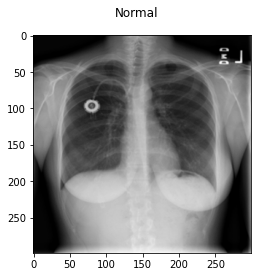

In [36]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/Normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Normal')
plt.imshow(normal_images[0], cmap='gray') 


In [ ]:
print("\nNormal images:\n",len(normal_images))


Normal images:
 10192


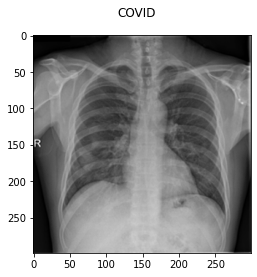

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/COVID/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('COVID')
plt.imshow(covid_images[0], cmap='gray') 






In [ ]:
print("\nCovid images:\n",len(covid_images))


Covid images:
 3616


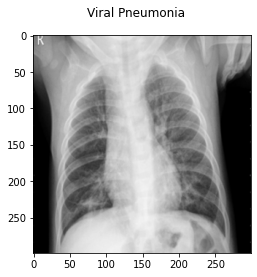

In [37]:

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

pneumonia_images = []
for img_path in glob.glob(DATASET_DIR + '/Viral Pneumonia/*'):
    pneumonia_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Viral Pneumonia')
plt.imshow(pneumonia_images[0], cmap='gray') 



In [ ]:
print("\nViral pneumonia images:\n",len(pneumonia_images))


Viral pneumonia images:
 1345


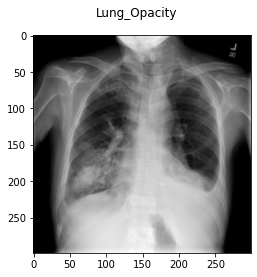

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

lung_opacity_images = []
for img_path in glob.glob(DATASET_DIR + '/Lung_Opacity/*'):
    lung_opacity_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Lung_Opacity')
plt.imshow(lung_opacity_images[0], cmap='gray') 


In [ ]:
print("\nLung Opacity images:\n",len(lung_opacity_images))


Lung Opacity images:
 6012


In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 4
EPOCHS = 48
BATCH_SIZE = 6




In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation("softmax"))

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)       

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)


In [26]:
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

Found 14818 images belonging to 4 classes.


In [27]:
validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 6347 images belonging to 4 classes.


In [28]:
history= model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = 48)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
2469/2469 [==============================] - 166s 67ms/step - loss: 1.1009 - accuracy: 0.5364 - val_loss: 0.9028 - val_accuracy: 0.6427
Epoch 2/48
2469/2469 [==============================] - 164s 67ms/step - loss: 0.8440 - accuracy: 0.6643 - val_loss: 0.8921 - val_accuracy: 0.6265
Epoch 3/48
2469/2469 [==============================] - 163s 66ms/step - loss: 0.7914 - accuracy: 0.6767 - val_loss: 0.7057 - val_accuracy: 0.7242
Epoch 4/48
2469/2469 [==============================] - 161s 65ms/step - loss: 0.7237 - accuracy: 0.7046 - val_loss: 0.6826 - val_accuracy: 0.7293
Epoch 5/48
2469/2469 [==============================] - 161s 65ms/step - loss: 0.6782 - accuracy: 0.7319 - val_loss: 0.6432 - val_accuracy: 0.7479
Epoch 6/48
2469/2469 [==============================] - 160s 65ms/step - loss: 0.6531 - accuracy: 0.7467 - val_loss: 0.5951 - val_accuracy: 0.7693
Epoch 7/48
2469/2469 [==============================] - 160s 65ms/step - loss: 0.6242 - accuracy: 0.7581 - val_loss: 0

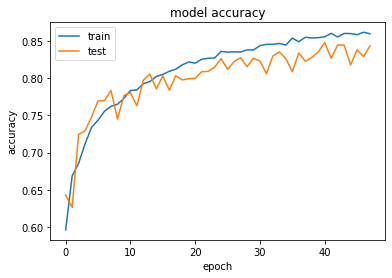

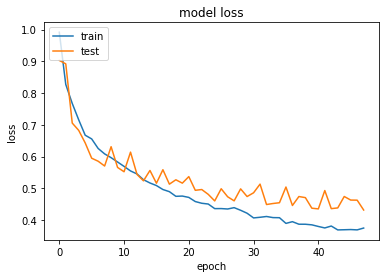

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.8595733046531677
validation_accuracy 0.8432670831680298


In [31]:
label = validation_generator.classes

In [32]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 1 0 ... 2 2 3]
{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}
['COVID', 'Lung_Opacity', 'COVID', 'COVID', 'COVID', 'COVID', 'Normal', 'COVID', 'Normal', 'COVID', 'COVID', 'Lung_Opacity', 'COVID', 'Normal', 'COVID', 'COVID', 'COVID', 'COVID', 'Lung_Opacity', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'Lung_Opacity', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'Lung_Opacity', 'COVID', 'COVID', 'Lung_Opacity', 'Normal', 'Normal', 'COVID', 'Lung_Opacity', 'COVID', 'COVID', 'Lung_Opacity', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'Normal', 'Lung_Opacity', 'Lung_Opacity', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'Normal', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'Normal', 'COVID', 'COVID', 'COVID', 'Lung_Opacity', 'COVID', 'COVID', 'Lung_Opacity', 'Lung_Opacity', 'COVID', 'Normal', 'Lung_Opacity', 'COVID', 'COVID', 'Lung_Opacity', 'COVID', 'COVID',

In [33]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[ 712,   72,   56,    4],
       [ 177, 1492,  163,    3],
       [ 161,  232, 2812,   99],
       [  34,    7,   26,  297]])

In [34]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,2,3,All
Actual,,,,,
0,712,177,161,34,1084
1,72,1492,232,7,1803
2,56,163,2812,26,3057
3,4,3,99,297,403
All,844,1835,3304,364,6347


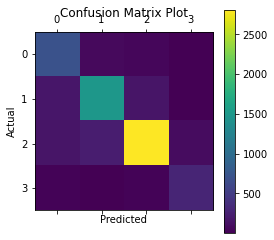

In [35]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();